# <center><b>Factors effecting Airbnb Prices in European Cities<b> </center>

---
# **Table of Contents**
---

**1.** [**Importing Libraries**](#Section1)<br>
**2.** [**Data Acquisition & Description**](#Section2)<br>
  - **2.1** [**Data Description**](#Section21)<br>
  - **2.2** [**Summary Statistics**](#Section22)<br>
  
**3.** [**Data Pre-Profiling**](#Section3)<br>
**4.** [**Data Preparation (Cleaning)**](#Section4)<br>
**5.** [**Exploratory Data Analysis (EDA)**](#Section5)<br>
**6.** [**Applying Random Forest Regressor**](#Section6)<br>
  - **6.1** [**Data Preparation**](#Section61)<br>
  - **6.2** [**Implementing the model**](#Section62)<br>
  - **6.3** [**Hyperparameter Tuning**](#Section63)<br>
  - **6.4** [**Feature Importance**](#Section64)<br>

**7.** [**Conclusion**](#Section7)<br>

---
<a name = Section1></a>
# **1. Importing Libraries**
---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import haversine as hs

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

---
<a name = Section2></a>
# **2. Data Acquisition & Description**
---
- The entire dataset is made up of sub-datasets corresponding to each city such as Amsterdam, Berlin, London, etc.
- Each city data is further divided into prices over weekdays and weekends.

| Records | Features |
| :--: | :--: |
| 51707 | 15 |

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| realSum | The total price of the Airbnb listing. (Numeric) |
|2| room_type | The type of room being offered (e.g. private, shared, etc.). (Categorical) |
|3| room_shared |Whether the room is shared or not. (Boolean) |
|4| room_private |	Whether the room is private or not. (Boolean) |
|5| person_capacity |	The maximum number of people that can stay in the room. (Numeric) |
|6| host_is_superhost |	Whether the host is a superhost or not. (Boolean) |
|7| multi |	Whether the listing is for multiple rooms or not. (Boolean) |
|8| biz |	Whether the listing is for business purposes or not. (Boolean) |
|9| cleanliness_rating |	The cleanliness rating of the listing. (Numeric) |
|10| guest_satisfaction_overall |	The overall guest satisfaction rating of the listing. (Numeric) |
|11| bedrooms | The number of bedrooms in the listing. (Numeric) |
|12| dist | The distance from the city centre. (Numeric) |
|13| metro_dist | The distance from the nearest metro station. (Numeric) |
|14| lng | The longitude of the listing. (Numeric) |
|15| lat | The latitude of the listing. (Numeric) |

#### Importing the data

In [4]:
# amsterdam
amsterdam_weekdays = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\amsterdam_weekdays.csv", index_col=False)
amsterdam_weekends = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\amsterdam_weekends.csv", index_col=False)

# athens
athens_weekdays = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\athens_weekdays.csv", index_col=False)
athens_weekends = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\athens_weekends.csv", index_col=False)

# barcelona
barcelona_weekdays = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\barcelona_weekdays.csv", index_col=False)
barcelona_weekends = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\barcelona_weekends.csv", index_col=False)

# berlin
berlin_weekdays = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\berlin_weekdays.csv", index_col=False)
berlin_weekends = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\berlin_weekends.csv", index_col=False)

# budapest
budapest_weekdays = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\budapest_weekdays.csv", index_col=False)
budapest_weekends = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\budapest_weekends.csv", index_col=False)

# lisbon
lisbon_weekdays = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\lisbon_weekdays.csv", index_col=False)
lisbon_weekends = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\lisbon_weekends.csv", index_col=False)

# london
london_weekdays = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\london_weekdays.csv", index_col=False)
london_weekends = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\london_weekends.csv", index_col=False)

# paris
paris_weekdays = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\paris_weekdays.csv", index_col=False)
paris_weekends = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\paris_weekends.csv", index_col=False)

# rome
rome_weekdays = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\rome_weekdays.csv", index_col=False)
rome_weekends = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\rome_weekends.csv", index_col=False)

# vienna
vienna_weekdays = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\vienna_weekdays.csv", index_col=False)
vienna_weekends = pd.read_csv(r"D:\Projects\Airbnb-Price-Factors\archive (1)\vienna_weekends.csv", index_col=False)

In [5]:
amsterdam_weekdays.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


Defining a function to combine datasets according to the city and time of the week.

In [6]:
def comb(city, df1_weekdays, df2_weekends):
    df1_weekdays['city'] = city
    df2_weekends['city'] = city
    df1_weekdays['time_of_week'] = 'weekdays'
    df2_weekends['time_of_week'] = 'weekends'
    df = pd.concat(objs=[df1_weekdays, df2_weekends], axis=0)
    return df

In [7]:
amsterdam = comb('amsterdam', amsterdam_weekdays, amsterdam_weekends)
athens = comb('athens', athens_weekdays, athens_weekends)
barcelona = comb('barcelon', barcelona_weekdays, barcelona_weekends)
berlin = comb('berlin', berlin_weekdays, berlin_weekends)
budapest = comb('budapest', budapest_weekdays, budapest_weekends)
lisbon = comb('lisbon', lisbon_weekdays, lisbon_weekends)
london = comb('london', london_weekdays, london_weekends)
paris = comb('paris', paris_weekdays, paris_weekends)
rome = comb('rome', rome_weekdays, rome_weekends)
vienna = comb('vienna', vienna_weekdays, vienna_weekends)

Combining all the city-wise datasets to create one data frame.

In [8]:
airbnb_df = amsterdam.copy()

In [9]:
df_ls = [athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]

for df in df_ls:
    airbnb_df = pd.concat(objs=[airbnb_df, df], axis = 0)

In [10]:
airbnb_df['city'].value_counts()

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelon     2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

In [11]:
airbnb_df.shape

(51707, 22)

<a name=Section21></a>
#### **2.1 Data Description**

In [12]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51707 entries, 0 to 1798
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  5170

<a name=Section22></a>
#### **2.2 Summary Statistics**

In [13]:
airbnb_df.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,1620.502388,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,1217.380366,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,0.000000,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,646.000000,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,1334.000000,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,2382.000000,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,5378.000000,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


<a name=Section3></a>
### **3. Data Pre-Profiling**

#### Checking for Missing values.

In [14]:
# checking for missing values
airbnb_df.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
time_of_week                  0
dtype: int64

- We see that there are no missing values.

#### Checking for duplicates.

In [15]:
airbnb_df.duplicated().any()

False

- We see that there are no duplicate rows either.

<a name=Section4></a>
### **4. Data Preparation (Cleaning)**

Dropping **Unnamed: 0** because it's an index column.

In [16]:
airbnb_df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [17]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51707 entries, 0 to 1798
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  5170

- We see that the columns **multi** and **biz** have data type as **int64**, but according to the data dictionary they are supposed to be of type **boolean**.
- So we will typecast those column values to **boolean**.
- We will do so by defining a function.

In [18]:
def to_bool(x):
    if x == 1:
        return True
    elif x == 0:
        return False    

In [19]:
airbnb_df['multi'] = airbnb_df['multi'].apply(to_bool)

In [20]:
airbnb_df['biz'] = airbnb_df['biz'].apply(to_bool)

In [21]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51707 entries, 0 to 1798
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  bool   
 7   biz                         51707 non-null  bool   
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  5170

- We will also create a new feature called **haversine_distance**, which will be the distance between the airbnb location and **null island (Latitude = 0 and Longitude = 0)**.

#### Feature Engineering

- This feature will combine the two features **lng** and **lat** to create a new feature called **haversine_distance**.
- We will do this be defining a function called **haversine_dist**.

In [22]:
def haversine_dist(lng, lat):
    latitude = np.radians(lat)
    longitude = np.radians(lng)

    null_isle_latitude = np.radians(0)
    null_isle_longitude = np.radians(0)

    # apply Haversine formula to compute distance
    latitude_distance = null_isle_latitude - latitude
    longitude_distance = null_isle_longitude - longitude
    a = np.sin(latitude_distance/2)**2 + np.cos(latitude) * np.cos(null_isle_latitude) * np.sin(longitude_distance/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return distance

In [23]:
airbnb_df['haversine_dist'] = haversine_dist(airbnb_df['lng'], airbnb_df['lat'])

In [24]:
airbnb_df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,time_of_week,haversine_dist
0,194.033698,Private room,False,True,2.0,False,True,False,10.0,93.0,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,5846.526443
1,344.245776,Private room,False,True,4.0,False,False,False,8.0,85.0,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,5841.687430
2,264.101422,Private room,False,True,2.0,False,False,True,9.0,87.0,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,5840.771088
3,433.529398,Private room,False,True,4.0,False,False,True,9.0,90.0,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,5841.899872
4,485.552926,Private room,False,True,2.0,True,False,False,10.0,98.0,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,5841.774808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,715.938574,Entire home/apt,False,False,6.0,False,False,True,10.0,100.0,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekends,5588.367767
1795,304.793960,Entire home/apt,False,False,2.0,False,False,False,8.0,86.0,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekends,5587.534157
1796,637.168969,Entire home/apt,False,False,2.0,False,False,False,10.0,93.0,...,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekends,5587.839197
1797,301.054157,Private room,False,True,2.0,False,False,False,10.0,87.0,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekends,5585.322001


- We will drop **attr_index**, **attr_index_norm**, **rest_index**, and **rest_index_norm** columns because there is no documentation for them. Hence they won't be a part of this analysis.
- We will also drop the columns **lng** and **lat**

In [25]:
airbnb_df.drop(labels=['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat'], axis = 1, inplace=True)

In [26]:
airbnb_df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,city,time_of_week,haversine_dist
0,194.033698,Private room,False,True,2.0,False,True,False,10.0,93.0,1,5.022964,2.539380,amsterdam,weekdays,5846.526443
1,344.245776,Private room,False,True,4.0,False,False,False,8.0,85.0,1,0.488389,0.239404,amsterdam,weekdays,5841.687430
2,264.101422,Private room,False,True,2.0,False,False,True,9.0,87.0,1,5.748312,3.651621,amsterdam,weekdays,5840.771088
3,433.529398,Private room,False,True,4.0,False,False,True,9.0,90.0,2,0.384862,0.439876,amsterdam,weekdays,5841.899872
4,485.552926,Private room,False,True,2.0,True,False,False,10.0,98.0,1,0.544738,0.318693,amsterdam,weekdays,5841.774808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,715.938574,Entire home/apt,False,False,6.0,False,False,True,10.0,100.0,3,0.530181,0.135447,vienna,weekends,5588.367767
1795,304.793960,Entire home/apt,False,False,2.0,False,False,False,8.0,86.0,1,0.810205,0.100839,vienna,weekends,5587.534157
1796,637.168969,Entire home/apt,False,False,2.0,False,False,False,10.0,93.0,1,0.994051,0.202539,vienna,weekends,5587.839197
1797,301.054157,Private room,False,True,2.0,False,False,False,10.0,87.0,1,3.044100,0.287435,vienna,weekends,5585.322001


<a name=Section5></a>
### **5. Exploratory Data Analysis (EDA)**

In [27]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51707 entries, 0 to 1798
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  bool   
 7   biz                         51707 non-null  bool   
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  city                        5170

In [28]:
airbnb_df.describe()

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,haversine_dist
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,9.390624,92.628232,1.15876,3.191285,0.681540,5232.551067
std,327.948386,1.298545,0.954868,8.945531,0.62741,2.393803,0.858023,502.538886
min,34.779339,2.000000,2.000000,20.000000,0.00000,0.015045,0.002301,4403.930884
25%,148.752174,2.000000,9.000000,90.000000,1.00000,1.453142,0.248480,4824.169685
50%,211.343089,3.000000,10.000000,95.000000,1.00000,2.613538,0.413269,5438.056000
75%,319.694287,4.000000,10.000000,99.000000,1.00000,4.263077,0.737840,5723.428514
max,18545.450285,6.000000,10.000000,100.000000,10.00000,25.284557,14.273577,5986.011937


- We can see that for the column **realSum** there is a considerable difference between the mean and median, suggesting a skew.
- Let's verify the same using a histplot.

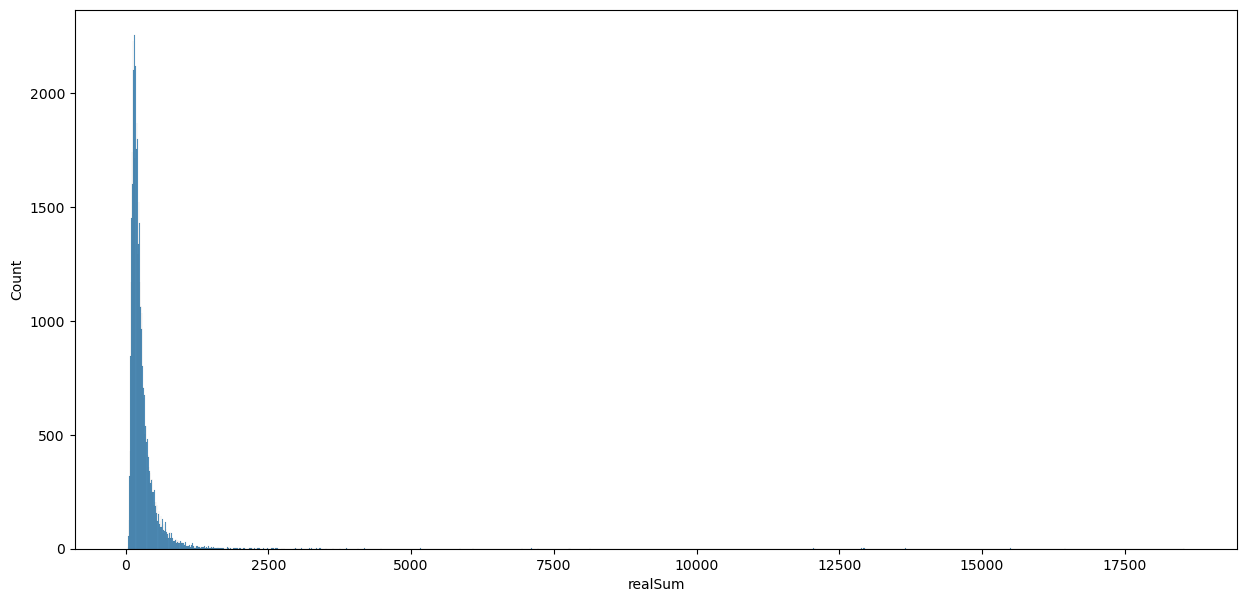

In [29]:
paper = plt.figure(figsize=[15,7])
sns.histplot(data = airbnb_df, x = 'realSum')
plt.show()

- We see that the column **realSum** is indeed highly skewed.
- Let's verify if the distribution improves if we take a log transform.

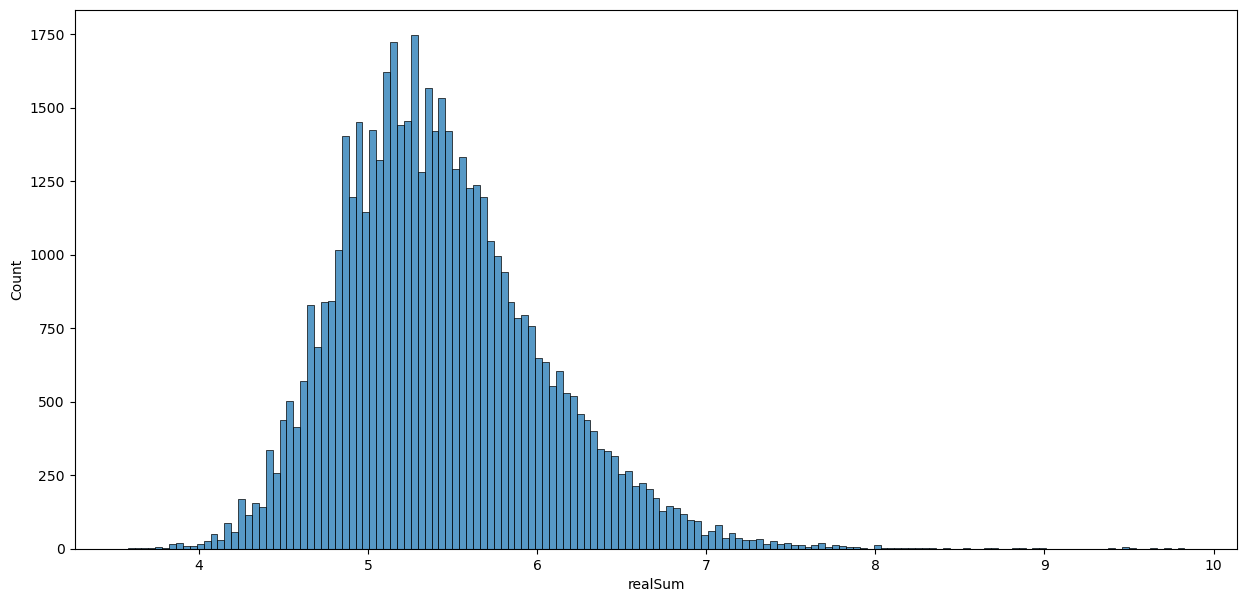

In [30]:
paper = plt.figure(figsize=[15,7])
sns.histplot(data = airbnb_df, x = np.log1p(airbnb_df['realSum']))
plt.show()

- We see that after taking the **Log Transform** the distribution has greatly improved.
- For further analysis we will consider the transformed values of the data.

#### Q1. Effect of the type of room (room_type) on the Airbnb prices (realSum).

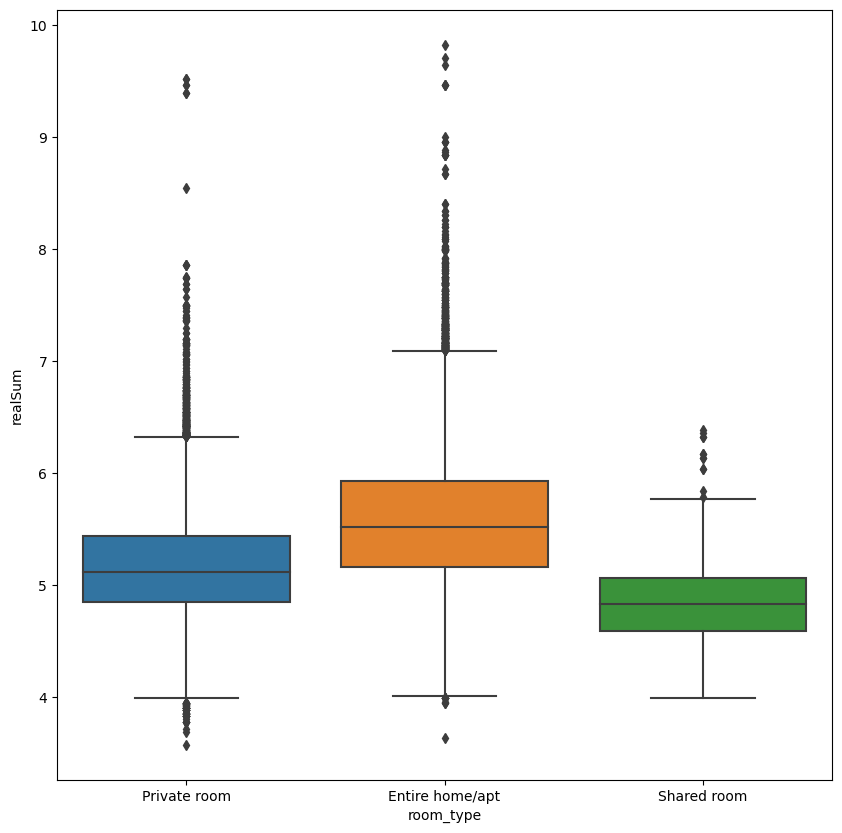

In [31]:
paper = plt.figure(figsize=[10,10])
sns.boxplot(data = airbnb_df, x = 'room_type', y = np.log1p(airbnb_df['realSum']))
plt.show()

- We see that the median prices for **Entire home/apt** is higher as compared to **Private rooms** and **Shared rooms**.
- **Private rooms** are more expensive than **Shared rooms**.

#### Q2. Whether the host being a Super host increases the prices of the Airbnb.

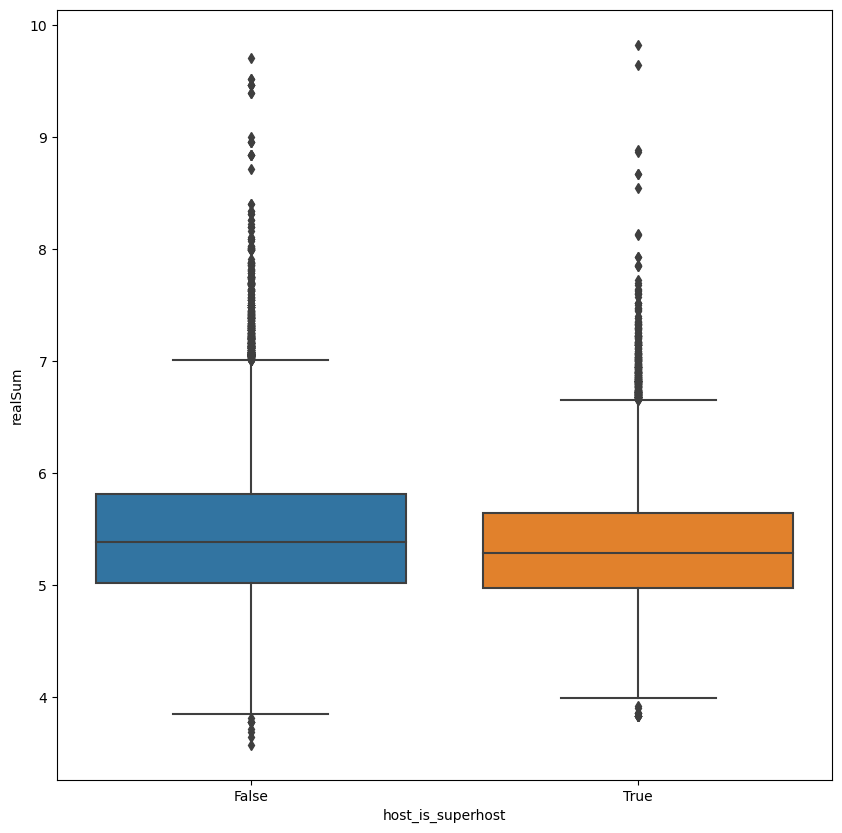

In [32]:
paper = plt.figure(figsize=[10,10])
sns.boxplot(data = airbnb_df, x = 'host_is_superhost', y = np.log1p(airbnb_df['realSum']))
plt.show()

- We see that the median prices for Airbnb's hosted by Super hosts is less as compared to the Airbnb's not hosted by super hosts. 
- This suggests that the host being a Super host doesn't necessarily guarantee that the prices will increase.

#### Q3. How the prices vary across major European cities.

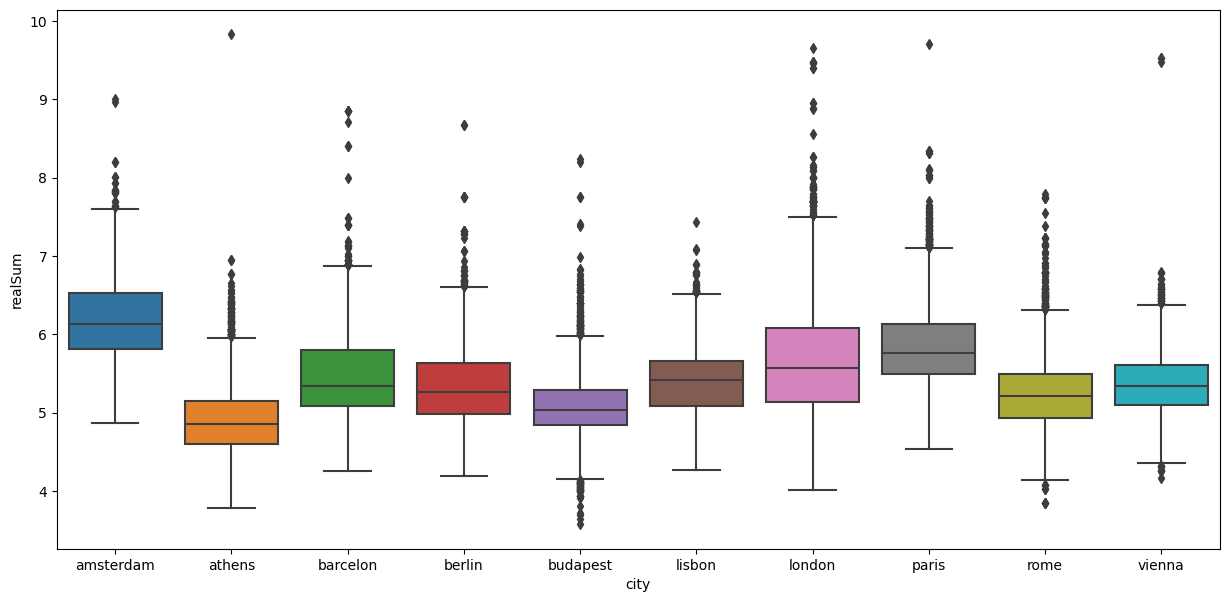

In [33]:
paper = plt.figure(figsize=[15,7])
sns.boxplot(data = airbnb_df, x = 'city', y = np.log1p(airbnb_df['realSum']))
plt.show()

- We see that out of all the European cities, **Amsterdam** has the highest median prices for Airbnbs followed by **London**,and **Lisbon**.

#### Q4. Whether the price of the Airbnb increases during the weekends or not?

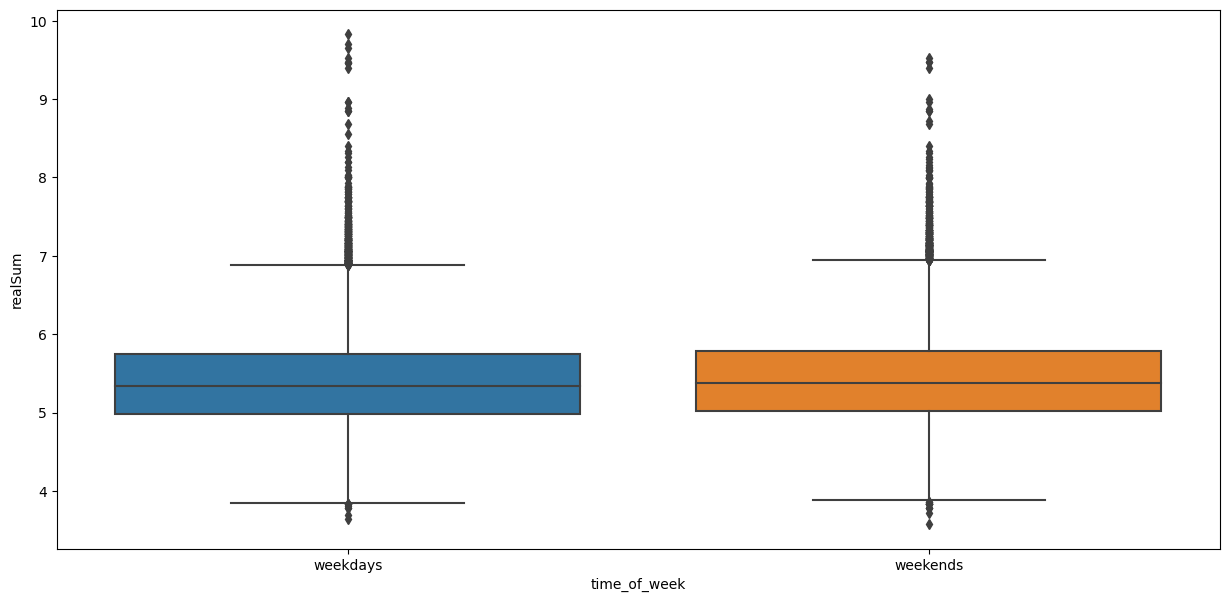

In [34]:
paper = plt.figure(figsize=[15,7])
sns.boxplot(data = airbnb_df, x = 'time_of_week', y = np.log1p(airbnb_df['realSum']))
plt.show()

- We see that the time of the week doesn't really impact the prices.

#### Q5. Effect of <u>Distance from the city centre</u> and <u>Cleanliness Rating</u> on the Price.

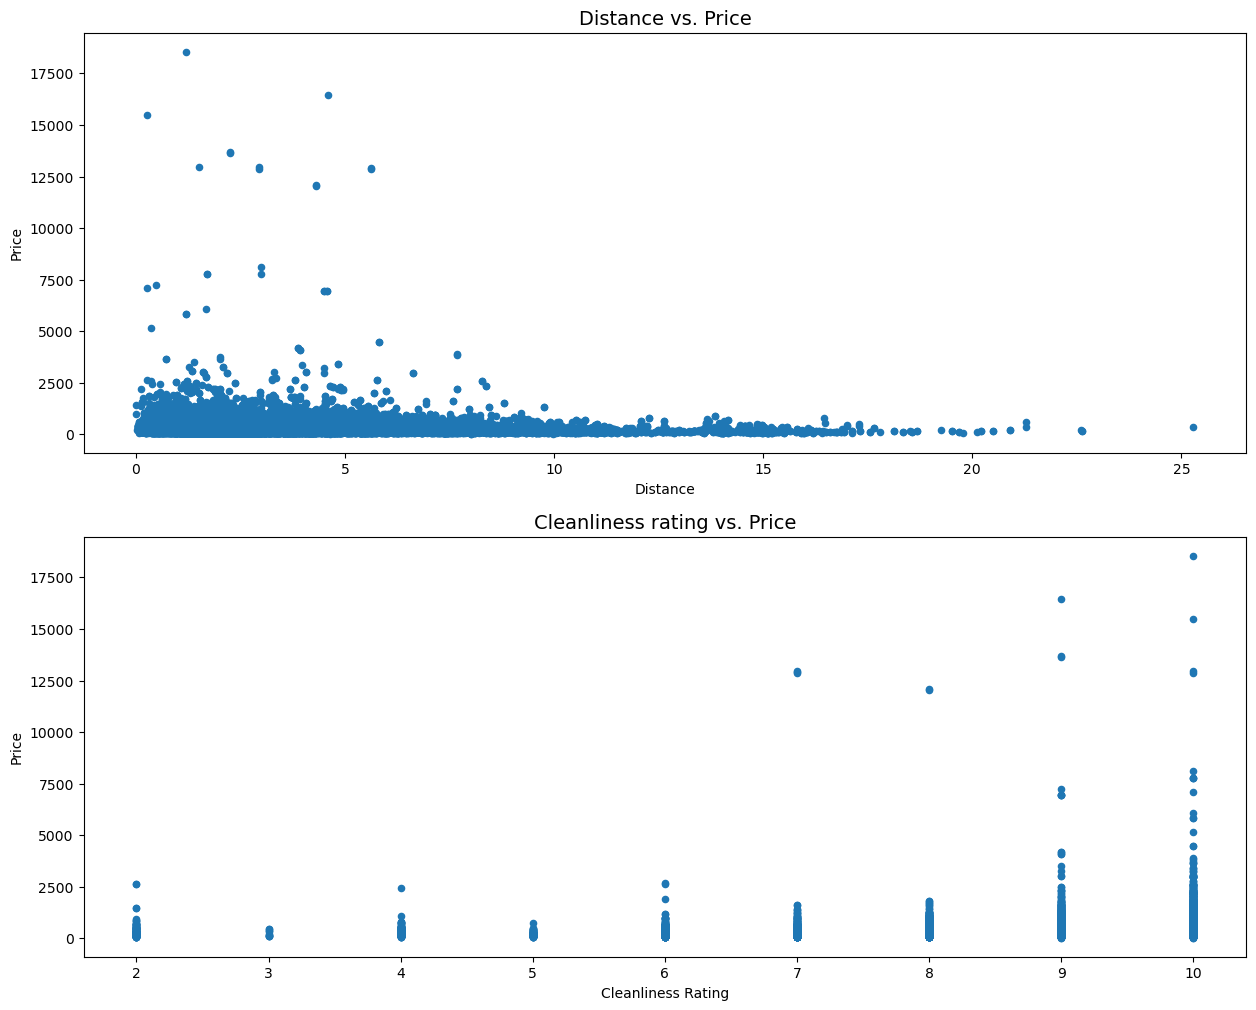

In [35]:
fig = plt.figure(figsize=[15,12])

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

airbnb_df.plot.scatter(x = 'dist', y = 'realSum', ax = ax1)
ax1.set_title("Distance vs. Price", size = 14)
ax1.xaxis.set_label_text("Distance")
ax1.yaxis.set_label_text("Price")


airbnb_df.plot.scatter(x = 'cleanliness_rating', y = 'realSum', ax = ax2)
ax2.set_title("Cleanliness rating vs. Price", size = 14)
ax2.xaxis.set_label_text("Cleanliness Rating")
ax2.yaxis.set_label_text("Price")
plt.show()

- We see that **Price** of an Airbnb increases with the cleanliness rating of the place.
- It also increases as the distance from the city centre decreases.

#### Q6. Effect of <u>Guest Satisfaction rating</u> and <u>Number of bedrooms in the Airbnb</u> on the Price.

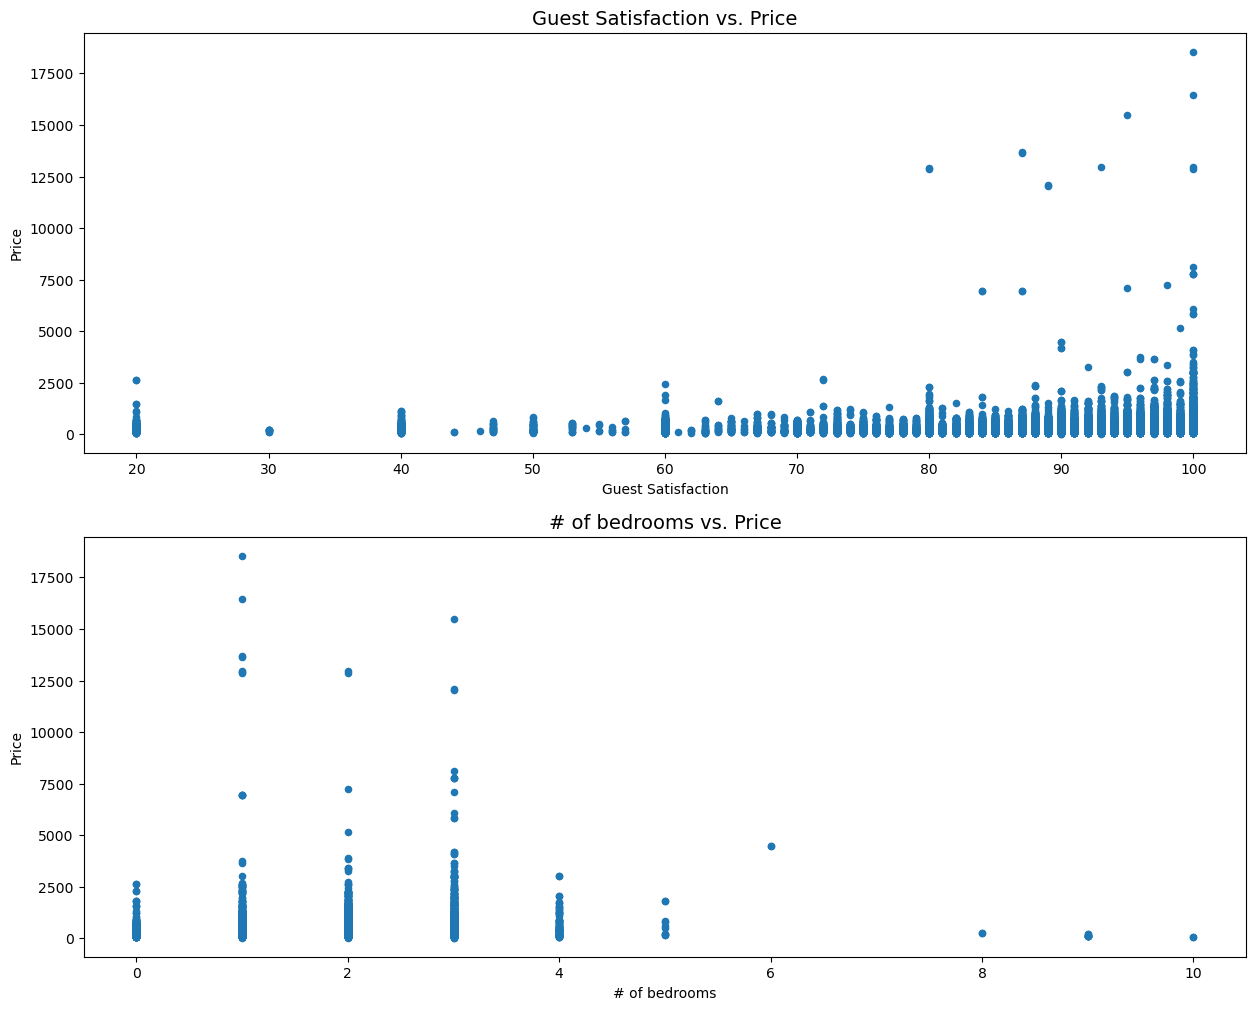

In [36]:
fig = plt.figure(figsize=[15,12])

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

airbnb_df.plot.scatter(x = 'guest_satisfaction_overall', y = 'realSum', ax = ax1)
ax1.set_title("Guest Satisfaction vs. Price", size = 14)
ax1.xaxis.set_label_text("Guest Satisfaction")
ax1.yaxis.set_label_text("Price")


airbnb_df.plot.scatter(x = 'bedrooms', y = 'realSum', ax = ax2)
ax2.set_title("# of bedrooms vs. Price", size = 14)
ax2.xaxis.set_label_text("# of bedrooms")
ax2.yaxis.set_label_text("Price")
plt.show()

#### Q7. Effect of <u>Distance of Airbnb from metro stations</u> on the Price.

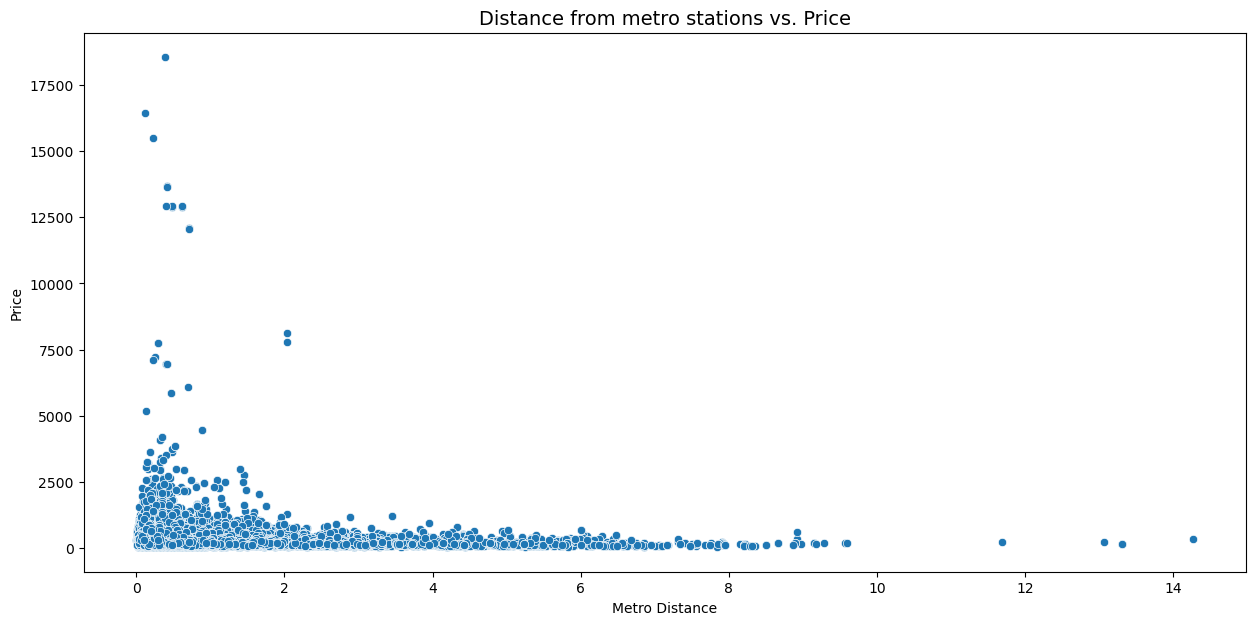

In [37]:
fig = plt.figure(figsize=[15,7])
sns.scatterplot(data = airbnb_df, x = 'metro_dist', y = 'realSum')
plt.title("Distance from metro stations vs. Price", size = 14)
plt.xlabel("Metro Distance")
plt.ylabel('Price')
plt.show()

- We see that the prices of Airbnbs increases the closer they are to the Metro stations.

In [38]:
airbnb_df.skew()

realSum                       21.419957
room_shared                   11.759724
room_private                   0.576497
person_capacity                0.760003
host_is_superhost              1.118798
multi                          0.918395
biz                            0.628049
cleanliness_rating            -2.850286
guest_satisfaction_overall    -3.174908
bedrooms                       1.367776
dist                           1.731195
metro_dist                     4.060445
haversine_dist                -0.263627
dtype: float64

<a name=Section6></a>
### **6. Applying Random Forest Regressor**

<a name=Section61></a>
#### **6.1 Data Preparation**

#### Dropping redundant columns.

In [39]:
grp_dat = airbnb_df[airbnb_df['room_type'] == 'Shared room']
grp_dat['room_shared'].value_counts()

True    366
Name: room_shared, dtype: int64

- We see that for data points where the **room_type** is **shared** the values in the column **room_shared** are all true. 

In [40]:
grp_dat = airbnb_df[airbnb_df['room_type'] == 'Private room']
grp_dat['room_private'].value_counts()

True    18693
Name: room_private, dtype: int64

- Similarly, for data points where the **room_type** is private the values in the columns **room_private** are all true.
- This shows that the columns **room_shared** and **room_private** are redundant, and therefore won't be considered for our analysis.

In [41]:
airbnb_df.drop(labels = ['room_shared', 'room_private'], axis = 1, inplace=True)

#### Checking for Skewness

In [42]:
airbnb_df.skew()

realSum                       21.419957
person_capacity                0.760003
host_is_superhost              1.118798
multi                          0.918395
biz                            0.628049
cleanliness_rating            -2.850286
guest_satisfaction_overall    -3.174908
bedrooms                       1.367776
dist                           1.731195
metro_dist                     4.060445
haversine_dist                -0.263627
dtype: float64

- We see that the columns **realSum**, **cleanliness_rating**, **guest_satisfaction_overall**, **bedrooms**, **dist**, **metro_dist** are highly skewed.
- We will try to reduce this skewness by taking a **Log Transformation**.

In [43]:
skew_ls = ['realSum', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist']

for i in skew_ls:
    airbnb_df[i] = np.log1p(airbnb_df[i])

In [44]:
airbnb_df[skew_ls].skew()

realSum                       0.717230
cleanliness_rating           -5.057365
guest_satisfaction_overall   -6.209071
bedrooms                     -0.536250
dist                          0.128965
metro_dist                    1.897032
dtype: float64

- We see that we were able to reduce the skewness of some features like **realSum**, **bedrooms**, **dist**, and **metro_dist**. 
- But the skewness of **cleanliness_rating** and **guest_satisfaction_overall** increased.

#### Encoding for categorical and boolean features.

In [45]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51707 entries, 0 to 1798
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   person_capacity             51707 non-null  float64
 3   host_is_superhost           51707 non-null  bool   
 4   multi                       51707 non-null  bool   
 5   biz                         51707 non-null  bool   
 6   cleanliness_rating          51707 non-null  float64
 7   guest_satisfaction_overall  51707 non-null  float64
 8   bedrooms                    51707 non-null  float64
 9   dist                        51707 non-null  float64
 10  metro_dist                  51707 non-null  float64
 11  city                        51707 non-null  object 
 12  time_of_week                51707 non-null  object 
 13  haversine_dist              5170

In [46]:
airbnb_df['room_type'].value_counts()

Entire home/apt    32648
Private room       18693
Shared room          366
Name: room_type, dtype: int64

- For features like **room_type** and **time_of_week** we will use **Label Encoding** since they have 3 or fewer categories.
- We will use Label Encoding for boolean features as well.
- For the column **city** which has 10 categories in total we will use **One-hot encoding**.

In [47]:
le = LabelEncoder()
feat_ls = ['room_type', 'host_is_superhost', 'multi', 'biz', 'time_of_week']

for i in feat_ls:
    airbnb_df[i] = le.fit_transform(airbnb_df[i])

In [48]:
airbnb_df = pd.get_dummies(data = airbnb_df, columns = ['city'], drop_first=True)

In [49]:
airbnb_df.head()

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,...,haversine_dist,city_athens,city_barcelon,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna
0,5.273172,1,2.0,0,1,0,2.397895,4.543295,0.693147,1.795579,...,5846.526443,0,0,0,0,0,0,0,0,0
1,5.844257,1,4.0,0,0,0,2.197225,4.454347,0.693147,0.397695,...,5841.687430,0,0,0,0,0,0,0,0,0
2,5.580112,1,2.0,0,0,1,2.302585,4.477337,0.693147,1.909292,...,5840.771088,0,0,0,0,0,0,0,0,0
3,6.074264,1,4.0,0,0,1,2.302585,4.510860,1.098612,0.325601,...,5841.899872,0,0,0,0,0,0,0,0,0
4,6.187346,1,2.0,1,0,0,2.397895,4.595120,0.693147,0.434854,...,5841.774808,0,0,0,0,0,0,0,0,0


#### Splitting data into x and y.

- We are trying to find the factors that most influence the prices of Airbnb's across major European cities.
- To do that we will implement RF regressor to predict the prices and based on the prediction we will determine the most important features.
- Therefore, our target variable is **realSum**, so our **y** will be **realSum**.

In [50]:
x = airbnb_df.drop(labels=['realSum'], axis = 1)
y = airbnb_df['realSum']

#### Splitting into X_train, X_test, Y_train, Y_test.

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
X_train.shape

(41365, 21)

In [53]:
X_test.shape

(10342, 21)

In [54]:
Y_train.shape

(41365,)

In [55]:
Y_test.shape

(10342,)

<a name=Section62></a>
#### **6.2 Implementing the Model**

In [56]:
alg = RandomForestRegressor(random_state=42)

alg.fit(X_train, Y_train)

train_predictions = alg.predict(X_train)
test_predictions = alg.predict(X_test)


train_RMSE = np.sqrt(mean_squared_error(Y_train, train_predictions))
train_MAPE = mean_absolute_percentage_error(Y_train, train_predictions)

test_RMSE = np.sqrt(mean_squared_error(Y_test, test_predictions))
test_MAPE = mean_absolute_percentage_error(Y_test, test_predictions)



print(f'Performance Metrics of Random Forest Regressor:')
print(f'[Train RMSE]: {train_RMSE} [Train MAPE]: {train_MAPE}')
print(f'[Test RMSE]: {test_RMSE} [Test MAPE]: {test_MAPE}')

Performance Metrics of Random Forest Regressor:
[Train RMSE]: 0.08923306355636432 [Train MAPE]: 0.011015418224795638
[Test RMSE]: 0.231324767668368 [Test MAPE]: 0.029060975132804097


<a name=Section63></a>
#### **6.3 Hyperparameter tuning**

#### Defining the parameters grid.

In [57]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [58]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
2
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

#### Using RandomisedSearchCV for hyperparameter tuning.

In [59]:
best_model = rf_random.best_estimator_

In [60]:
new_preds_test = best_model.predict(X_test)
new_preds_train = best_model.predict(X_train)

new_train_MAPE = mean_absolute_percentage_error(Y_train, new_preds_train)
new_test_RMSE = np.sqrt(mean_squared_error(Y_test, new_preds_test))
new_test_MAPE = mean_absolute_percentage_error(Y_test, new_preds_test)

print(f'[Train MAPE]: {new_train_MAPE}')
print(f'[Test RMSE]: {new_test_RMSE} [Test MAPE]: {new_test_MAPE}')

[Train MAPE]: 0.015579809620428894
[Test RMSE]: 0.24684949320565705 [Test MAPE]: 0.031222848708294355


<a name=Section64></a>
#### **6.4 Feature Importance**

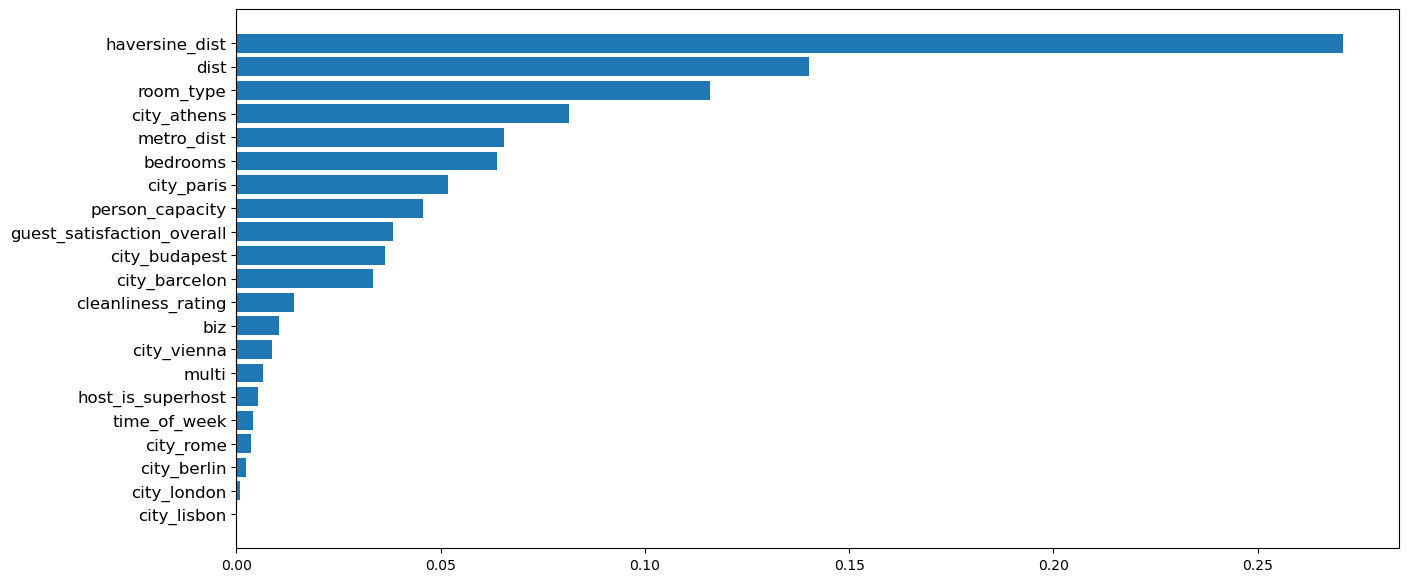

In [61]:
features = X_train.columns
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=[15, 7])
plt.barh(y=range(len(indices)), width=importances[indices], align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=12)
plt.show()

- We see that the feature we created using the columns **lng (Longitude)** and **lat (Latitude)** called **haversine_distance** is the most important feature, that is the location of the Airbnb is the most important factor effecting the price of the Airbnb.
- Another important factor that impacts the prices is the distance of the Airbnb from the city centre.
- Apart from that factors like **room_type**, **metro_distance**, **city**, etc. also impact the prices of the Airbnb.

<a name=Section7></a>
### **7. Conclusion**

- The dataset had **51707** records and **22** features.
- It included the prices for Airbnb's across major European cities.
- After running a **Random Forest Regressor** we were able to identify the major factors that effected the prices.
- Major factors effecting the prices were **Location of the Airbnb**, **Distance of the Airbnb from the city centre**, **Type of room (Entire apt/Shared/Private**, **City**, etc.